In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
col_name = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", 
            "slope", "ca", "thal", "target"]
data = pd.read_csv(url, names=col_name, na_values="?")

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [4]:
data = data.dropna()

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

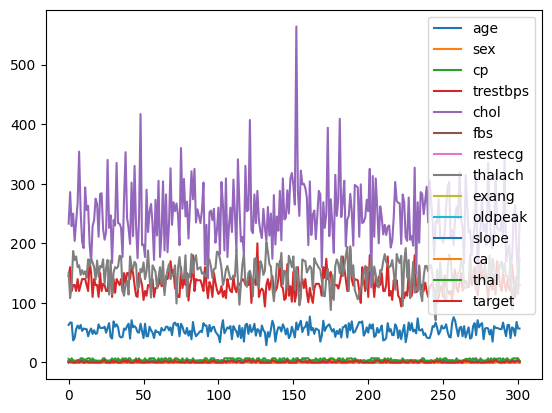

In [6]:
data.plot()

In [7]:
x = data.drop("target", axis=1) 
y = data["target"]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [9]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [10]:
classi = DecisionTreeClassifier(random_state = 12)
classi.fit(x_train, y_train)

DecisionTreeClassifier(random_state=12)

In [11]:
y_pred = classi.predict(x_test)

In [12]:
acc = accuracy_score(y_test, y_pred)

In [13]:
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.58


In [14]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.72      0.75        36
           1       0.27      0.33      0.30         9
           2       0.50      0.33      0.40         6
           3       0.29      0.29      0.29         7
           4       0.40      1.00      0.57         2

    accuracy                           0.58        60
   macro avg       0.45      0.53      0.46        60
weighted avg       0.61      0.58      0.59        60



In [15]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

#roc curve
yb=label_binarize(y, classes=[0,1,2,3,4])
nc = yb.shape[1] 
classifier1 = OneVsRestClassifier(classifier)
y_score=classifier1.fit(X_train,y_train).predict(X_test)
fpr=dict()
tpr=dict()
roc_auc=dict()

for i in range (nc):
    fpr[i],tpr[i],_=roc_curve(y_test == i, y_score)
    roc_auc[i]=auc(fpr[i],tpr[i])
plt.figure()
color=['blue','red','green','black', 'orange']
for i, color in zip(range(nc),color):
    plt.plot(fpr[i],tpr[i],color=color, lw=2, label='ROC (area={:.2f}) for class {}'.format(roc_auc[i],data['target'][i]))
plt.plot([0,1],[0,1],'k--',lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend()
plt.show()

NameError: name 'classifier' is not defined

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(x_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for svm = 0.6160337552742616
Accuracy for test set for svm = 0.5833333333333334


In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)


y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)
y_pred_train = classifier.predict(x_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Naive Bayes = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Naive Bayes = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))



Accuracy for training set for Naive Bayes = 0.33755274261603374
Accuracy for test set for Naive Bayes = 0.2833333333333333


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Accuracy for training set for Logistic Regression = 0.5232067510548524
Accuracy for test set for Logistic Regression = 0.6


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Decision Tree = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Decision Tree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Decision Tree = 0.7130801687763713
Accuracy for test set for Decision Tree = 0.38333333333333336
